# Project Python Data Analysis 

# 1ère Partie: Affichage des données 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
plt.close('all')

In [133]:
database=pd.read_excel('/Users/reihan/Documents/rnd_ia/forecasting/vindemia/data/historical-data-10101010203.xls')  
database.head(10)

,PRODUCT_ID,TIME_FIELD,QUANTITY,SALE_AMOUNT,SALE_MARGIN,DELIVERY_MARGIN,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT
0,10101010203,02/01/2016,392.0,936.88,126.50847,32.18963,2.522783e+06,2593.8399,25,90
1,10101010203,03/01/2016,79.0,188.81,25.47283,6.50970,4.720384e+05,486.4500,25,85
2,10101010203,04/01/2016,399.0,953.61,128.75157,32.78047,1.987010e+06,2409.1900,25,86
3,10101010203,05/01/2016,456.0,1089.84,146.44023,38.16785,2.224192e+06,2542.1300,23,86
4,10101010203,06/01/2016,639.0,1527.21,205.12897,53.56521,2.501014e+06,2747.0900,23,86
5,10101010203,07/01/2016,526.0,1257.14,168.79133,44.15570,2.240269e+06,2489.4600,24,88
6,10101010203,08/01/2016,448.0,1070.72,143.46423,37.90509,2.401189e+06,2527.7000,23,89
7,10101010203,09/01/2016,408.0,975.12,130.86154,34.31405,2.576818e+06,2546.1002,23,88
8,10101010203,10/01/2016,85.0,203.15,27.27660,7.64498,4.512337e+05,497.1100,24,89
9,10101010203,11/01/2016,426.0,1018.14,137.05120,37.96759,1.907706e+06,2180.2200,24,90


In [134]:
database.describe()

,PRODUCT_ID,QUANTITY,SALE_AMOUNT,SALE_MARGIN,DELIVERY_MARGIN,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT
count,1.293000e+03,1293.000000,1293.000000,1293.000000,1293.000000,1.293000e+03,1293.000000,1293.000000,1293.000000
mean,1.010101e+10,337.551084,802.165530,114.488072,22.363115,1.751703e+06,1954.811301,21.866203,85.423821
std,0.000000e+00,156.690427,365.916741,53.601598,19.499744,7.018497e+05,804.261947,2.752687,4.543030
min,1.010101e+10,23.000000,55.200000,10.082230,-15.375920,3.955956e+05,244.100000,16.000000,65.000000
25%,1.010101e+10,271.000000,652.470000,86.680840,2.527580,1.462623e+06,1668.160000,20.000000,83.000000
50%,1.010101e+10,341.000000,812.700000,116.275700,25.468940,1.703059e+06,1986.200000,22.000000,86.000000
75%,1.010101e+10,412.000000,979.200000,143.371630,34.843600,2.166775e+06,2356.540000,24.000000,89.000000
max,1.010101e+10,1477.000000,3234.050000,404.011510,137.950130,5.117415e+06,7811.080000,30.000000,96.000000


In [135]:
columns=database.columns
print(columns)

Index(['PRODUCT_ID', 'TIME_FIELD', 'QUANTITY', 'SALE_AMOUNT', 'SALE_MARGIN',
       'DELIVERY_MARGIN', 'STORE_SALES', 'FAM_SALES', 'TEMPERATURE',
       'HUMIDITY_MAX_PERCENT'],
      dtype='object')


In [136]:
database.shape

(1293, 10)

In [137]:
database['Margin_Unitaire'] = (database['SALE_MARGIN'] + database['DELIVERY_MARGIN']) / database['QUANTITY']
database['Unit_price'] = database['SALE_AMOUNT'] / database['QUANTITY']
cols = ['SALE_AMOUNT', 'SALE_MARGIN', 'DELIVERY_MARGIN','PRODUCT_ID']
database.drop(cols, axis=1, inplace=True)
database.columns

Index(['TIME_FIELD', 'QUANTITY', 'STORE_SALES', 'FAM_SALES', 'TEMPERATURE',
       'HUMIDITY_MAX_PERCENT', 'Margin_Unitaire', 'Unit_price'],
      dtype='object')

In [138]:
database.head()

,TIME_FIELD,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price
0,02/01/2016,392.0,2.522783e+06,2593.8399,25,90,0.404842,2.39
1,03/01/2016,79.0,4.720384e+05,486.4500,25,85,0.404842,2.39
2,04/01/2016,399.0,1.987010e+06,2409.1900,25,86,0.404842,2.39
3,05/01/2016,456.0,2.224192e+06,2542.1300,23,86,0.404842,2.39
4,06/01/2016,639.0,2.501014e+06,2747.0900,23,86,0.404842,2.39


### Gestion des types de données 

In [139]:
display(pd.isnull(database).count())

TIME_FIELD              1293
QUANTITY                1293
STORE_SALES             1293
FAM_SALES               1293
TEMPERATURE             1293
HUMIDITY_MAX_PERCENT    1293
Margin_Unitaire         1293
Unit_price              1293
dtype: int64

In [140]:
database.dtypes

TIME_FIELD               object
QUANTITY                float64
STORE_SALES             float64
FAM_SALES               float64
TEMPERATURE               int64
HUMIDITY_MAX_PERCENT      int64
Margin_Unitaire         float64
Unit_price              float64
dtype: object

In [141]:
database['TEMPERATURE'] = database['TEMPERATURE'].astype('float64')
database['HUMIDITY_MAX_PERCENT'] = database['HUMIDITY_MAX_PERCENT'].astype('float64')

In [142]:
database.dtypes

TIME_FIELD               object
QUANTITY                float64
STORE_SALES             float64
FAM_SALES               float64
TEMPERATURE             float64
HUMIDITY_MAX_PERCENT    float64
Margin_Unitaire         float64
Unit_price              float64
dtype: object

### Visualisation des données 

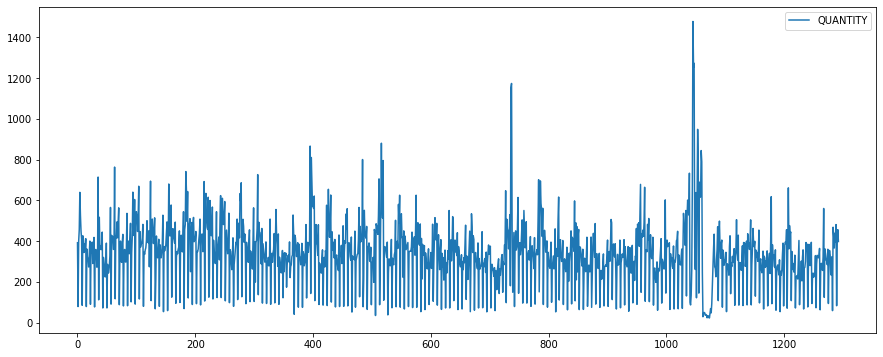

In [143]:
plt.figure(figsize=(15, 6))
ax = database['QUANTITY'].plot()
plt.legend()

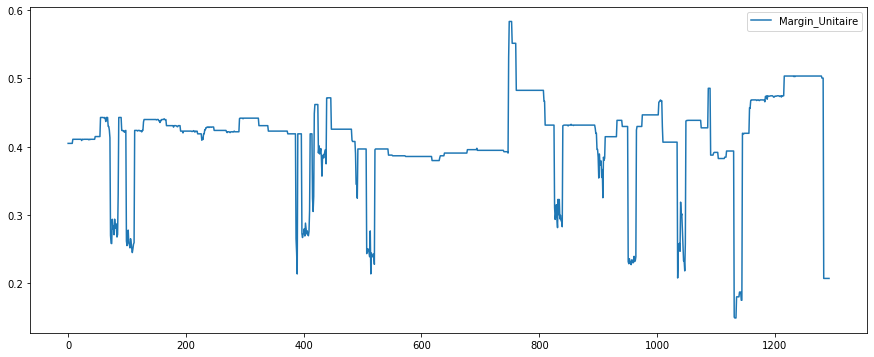

In [144]:
plt.figure(figsize=(15, 6))
ax = database['Margin_Unitaire'].plot()
plt.legend()

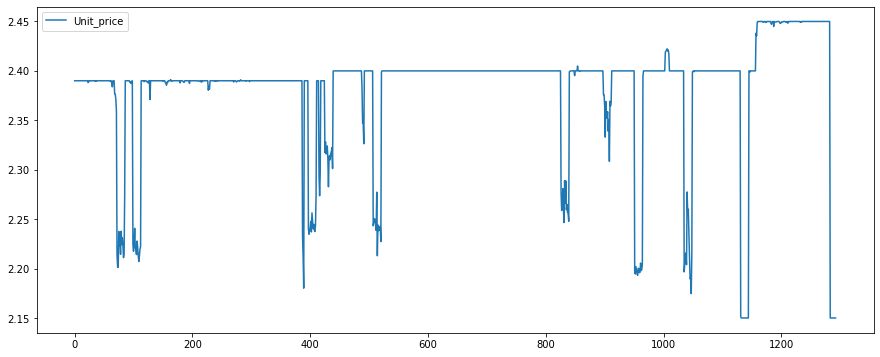

In [145]:
plt.figure(figsize=(15, 6))
ax = database['Unit_price'].plot()
plt.legend()

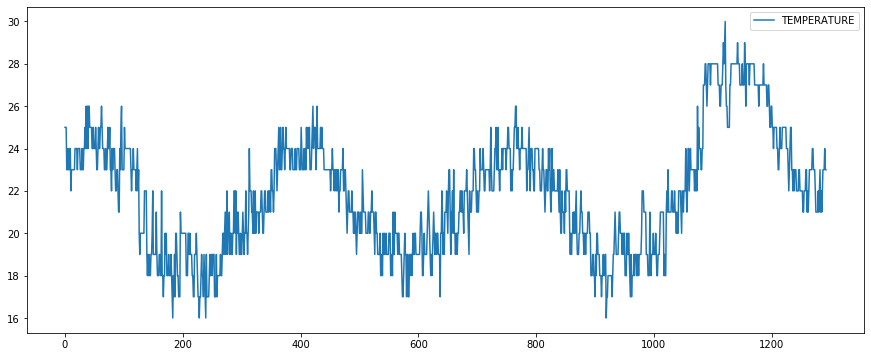

In [146]:
plt.figure(figsize=(15, 6))
ax = database['TEMPERATURE'].plot()
plt.legend()

### Suppression des outliers


............................

### Gestion des dates et choix de l'échelle temporelle de prédiction

In [147]:
database['TIME_FIELD'] = pd.to_datetime(database['TIME_FIELD'], format='%d/%m/%Y')
print('Nous avons les données depuis le ', database['TIME_FIELD'].min() , 'jusqu\' au ' , database['TIME_FIELD'].max() )
database = database.set_index('TIME_FIELD')

Nous avons les données depuis le  2016-01-02 00:00:00 jusqu' au  2019-07-31 00:00:00


In [148]:
database.head()

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price
TIME_FIELD,,,,,,,
2016-01-02,392.0,2.522783e+06,2593.8399,25.0,90.0,0.404842,2.39
2016-01-03,79.0,4.720384e+05,486.4500,25.0,85.0,0.404842,2.39
2016-01-04,399.0,1.987010e+06,2409.1900,25.0,86.0,0.404842,2.39
2016-01-05,456.0,2.224192e+06,2542.1300,23.0,86.0,0.404842,2.39
2016-01-06,639.0,2.501014e+06,2747.0900,23.0,86.0,0.404842,2.39


In [149]:
display(database.index)
database.index.day

DatetimeIndex(['2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05',
               '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-09',
               '2016-01-10', '2016-01-11',
               ...
               '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
               '2019-07-26', '2019-07-27', '2019-07-28', '2019-07-29',
               '2019-07-30', '2019-07-31'],
              dtype='datetime64[ns]', name='TIME_FIELD', length=1293, freq=None)

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='TIME_FIELD', length=1293)

In [150]:
database = database.assign( day = database.index.day)  
database = database.assign( week_day = database.index.weekday) 
database = database.assign( week = database.index.week)     
database = database.assign( month = database.index.month)
database['day'] = database['day'].astype('float64')
database['week_day'] = database['week_day'].astype('float64')
database['week'] = database['week'].astype('float64')
database['month'] = database['month'].astype('float64')
database.head(10)

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month
TIME_FIELD,,,,,,,,,,,
2016-01-02,392.0,2.522783e+06,2593.8399,25.0,90.0,0.404842,2.39,2.0,5.0,53.0,1.0
2016-01-03,79.0,4.720384e+05,486.4500,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0
2016-01-04,399.0,1.987010e+06,2409.1900,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0
2016-01-05,456.0,2.224192e+06,2542.1300,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0
2016-01-06,639.0,2.501014e+06,2747.0900,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0
2016-01-07,526.0,2.240269e+06,2489.4600,24.0,88.0,0.404842,2.39,7.0,3.0,1.0,1.0
2016-01-08,448.0,2.401189e+06,2527.7000,23.0,89.0,0.404842,2.39,8.0,4.0,1.0,1.0
2016-01-09,408.0,2.576818e+06,2546.1002,23.0,88.0,0.404842,2.39,9.0,5.0,1.0,1.0
2016-01-10,85.0,4.512337e+05,497.1100,24.0,89.0,0.410842,2.39,10.0,6.0,1.0,1.0


### Télécharger le nouveau dataset

In [151]:
#database.to_csv ('/Users/reihan/Documents/DossierPython/Flask_Docs/app/database.csv', index = True, header=True)

### Recherche des dates manquantes

In [152]:
for i in range(0,len(database['week_day'])-1):
    if(database['week_day'][i]+1!=database['week_day'][i+1] and database['week_day'][i]-6!= database['week_day'][i+1]):
        print(database.index[i])

2016-03-27 00:00:00
2016-04-30 00:00:00
2016-12-24 00:00:00
2016-12-31 00:00:00
2017-04-16 00:00:00
2017-04-30 00:00:00
2017-12-24 00:00:00
2017-12-31 00:00:00
2018-04-01 00:00:00
2018-04-30 00:00:00
2018-12-24 00:00:00
2018-12-31 00:00:00
2019-04-21 00:00:00
2019-04-30 00:00:00


In [153]:
data_sampler = database.resample('W')

In [154]:
new_data = data_sampler.sum()
cols=['TEMPERATURE' , 'HUMIDITY_MAX_PERCENT' ,  'Margin_Unitaire' , 'Unit_price','FAM_SALES','STORE_SALES', 'QUANTITY']
for c in cols:
    new_data[c] = data_sampler[c].mean()
new_data.head(10)

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month
TIME_FIELD,,,,,,,,,,,
2016-01-03,235.500000,1.497411e+06,1540.144950,25.000000,87.500000,0.404842,2.390000,5.0,11.0,106.0,2.0
2016-01-10,423.000000,2.054532e+06,2251.254314,23.571429,87.428571,0.405699,2.390000,49.0,21.0,7.0,7.0
2016-01-17,344.285714,1.734394e+06,1934.432857,23.000000,89.142857,0.410842,2.390000,98.0,21.0,14.0,7.0
2016-01-24,298.571429,1.602778e+06,1838.950000,23.714286,87.428571,0.410842,2.390000,147.0,21.0,21.0,7.0
2016-01-31,318.000000,1.671211e+06,1932.258586,23.571429,86.714286,0.410548,2.389699,196.0,21.0,28.0,7.0
2016-02-07,349.285714,1.880558e+06,2093.821257,24.142857,89.142857,0.410748,2.389904,28.0,21.0,35.0,14.0
2016-02-14,360.142857,1.853425e+06,2189.333071,25.142857,89.714286,0.410778,2.389934,77.0,21.0,42.0,14.0
2016-02-21,262.428571,1.540697e+06,1813.129029,24.428571,88.714286,0.413699,2.390000,126.0,21.0,49.0,14.0
2016-02-28,290.285714,1.600064e+06,1950.934271,24.000000,87.571429,0.426842,2.390000,175.0,21.0,56.0,14.0


In [155]:
#database.corr(method='pearson')
new_data.corr(method='spearman')
#database.corr(method='kendall')

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month
QUANTITY,1.000000,0.281544,0.922243,-0.167816,0.337582,-0.198660,-0.514162,-0.428146,0.036327,-0.106879,-0.068688
STORE_SALES,0.281544,1.000000,0.337151,0.139853,0.128882,0.120947,-0.012173,-0.549472,-0.177287,-0.001049,0.048558
FAM_SALES,0.922243,0.337151,1.000000,-0.169082,0.364809,-0.119392,-0.460759,-0.449557,0.019216,-0.131031,-0.091881
TEMPERATURE,-0.167816,0.139853,-0.169082,1.000000,-0.102668,0.117607,0.112429,-0.048218,-0.170801,-0.632770,-0.638010
HUMIDITY_MAX_PERCENT,0.337582,0.128882,0.364809,-0.102668,1.000000,-0.190001,-0.388870,-0.026441,0.062056,-0.099931,-0.099066
Margin_Unitaire,-0.198660,0.120947,-0.119392,0.117607,-0.190001,1.000000,0.473488,-0.073219,-0.025440,-0.041800,-0.030045
Unit_price,-0.514162,-0.012173,-0.460759,0.112429,-0.388870,0.473488,1.000000,0.016387,0.049592,0.130852,0.128828
day,-0.428146,-0.549472,-0.449557,-0.048218,-0.026441,-0.073219,0.016387,1.000000,0.030423,0.094157,0.043304
week_day,0.036327,-0.177287,0.019216,-0.170801,0.062056,-0.025440,0.049592,0.030423,1.000000,0.018462,0.041492
week,-0.106879,-0.001049,-0.131031,-0.632770,-0.099931,-0.041800,0.130852,0.094157,0.018462,1.000000,0.993112


A première vue, les données corrélées sont la marge et le prix unitaire ce qui est logique. On remarque également une forte corrélation entre la quantité et le CA des familles dans cette catégorie -> intéressant pour la future prédiction, on sait que cette variable aura un fort poids dans la prise de décision

 # Partie 2 : Prévision sans l'aspect temporel :
 
Objectif : Prédire la quantité d'article vendu un jour j en fonction des paramètres autres que ceux temporelles et 

In [156]:
database.head()

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month
TIME_FIELD,,,,,,,,,,,
2016-01-02,392.0,2.522783e+06,2593.8399,25.0,90.0,0.404842,2.39,2.0,5.0,53.0,1.0
2016-01-03,79.0,4.720384e+05,486.4500,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0
2016-01-04,399.0,1.987010e+06,2409.1900,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0
2016-01-05,456.0,2.224192e+06,2542.1300,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0
2016-01-06,639.0,2.501014e+06,2747.0900,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0


In [157]:
selector=[ 'Unit_price' , 'Margin_Unitaire', 'STORE_SALES' , 'TEMPERATURE' , 'HUMIDITY_MAX_PERCENT']
database[selector].head()

,Unit_price,Margin_Unitaire,STORE_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT
TIME_FIELD,,,,,
2016-01-02,2.39,0.404842,2.522783e+06,25.0,90.0
2016-01-03,2.39,0.404842,4.720384e+05,25.0,85.0
2016-01-04,2.39,0.404842,1.987010e+06,25.0,86.0
2016-01-05,2.39,0.404842,2.224192e+06,23.0,86.0
2016-01-06,2.39,0.404842,2.501014e+06,23.0,86.0


In [158]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =train_test_split(database[selector], database['QUANTITY'], test_size=0.15, shuffle=False)
print(X_train.shape , y_train.shape , X_val.shape, y_val.shape)

(1099, 5) (1099,) (194, 5) (194,)


In [159]:
#X_train.to_csv ('/Users/reihan/Documents/DossierPython/Flask_Docs/app/X_train.csv', index = False, header=True)
#X_val.to_csv ('/Users/reihan/Documents/DossierPython/Flask_Docs/app/X_val.csv', index = False, header=True)
#y_train.to_csv ('/Users/reihan/Documents/DossierPython/Flask_Docs/app/y_train.csv', index = False, header=True)
#y_val.to_csv ('/Users/reihan/Documents/DossierPython/Flask_Docs/app/y_val.csv', index = False, header=True)

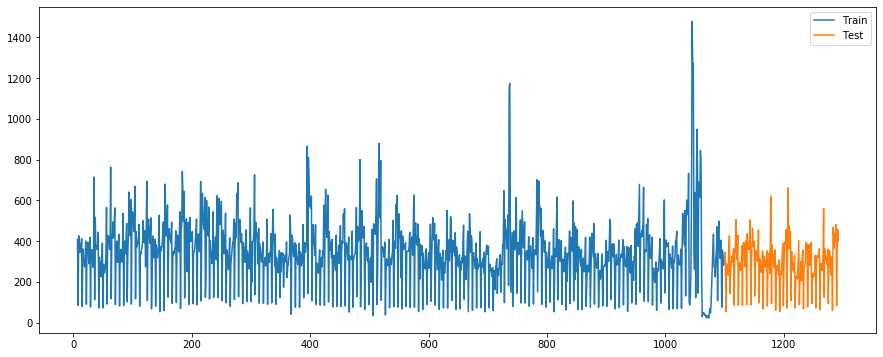

In [240]:
plt.figure(figsize=(15, 6))
ax = y_train.plot(label='Train')
y_val.plot(ax=ax , label='Test')
plt.legend()

### Fonctions mesures de l'erreur 

In [168]:
def pourcentageErreur(yTrue,yPred):
    x=abs(yTrue-yPred)/yTrue*100
    return(round(x,2))

def CreateTableError(y_val_pred,y_val):
    tabPercent=[]    
    for i in range (len(y_val_pred)):
        tabPercent.append(pourcentageErreur(y_val[i],y_val_pred[i]))
        if(i<10):
            print('valeur prédite: ',y_val_pred[i],'  valeure réelle :',y_val[i], '  pourcentage d erreur :', pourcentageErreur(y_val[i],y_val_pred[i]),'%' )
    return(tabPercent)
    
def OverXError(x,tabPercent):
    sumPercent=0
    for i in tabPercent:
        if(i>x):
           sumPercent+=1
    print('pourcentage d erreur supérieur à ',x,'% :',sumPercent/len(tabPercent)*100,'%')
    
def ErreurSur7jours(yPred,yTrue):
    sumPercent=[]
    sumSemainePred=[]
    sumSemaineTrue=[]
    x=1
    for i in range (len(yPred)):
        if(x<7):
            sumSemainePred.append(yPred[i])
            sumSemaineTrue.append(yTrue[i])
            x+=1
        else:
            x=1
            moyenneErreurSemaine=pourcentageErreur(mean(sumSemaineTrue),mean(sumSemainePred))
            sumPercent.append(moyenneErreurSemaine)
    return(sumPercent)

def plotThePrevision(yPred,yTrue):
    yPred=pd.DataFrame(yPred)
    yPred=yPred.set_index(y_val.index)
    plt.figure(figsize=(15, 6))
    ax = yTrue.plot(label='Train')
    yPred.plot(ax=ax , label='Valeur prédite')
    plt.legend()

### Prédiction par réseaux neuronnaux

In [169]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
neural_net= MLPRegressor(hidden_layer_sizes=1000,activation='relu',learning_rate='constant')
#model=neural_net.fit(X_train,y_train)
#y_val_pred_nn=model.predict(X_val)

start = time.time()

search_space = {'hidden_layer_sizes': [(200, ), (250, ), (64, 32, 16, ), (128, 64 , 32, ), (128,32,), (200,100,)],
               'alpha' : [0.001,0.005,0.02,0.025, 0.03] ,
               'learning_rate' : ['constant', 'invscaling', 'adaptive']}

model = GridSearchCV(estimator = neural_net , param_grid = search_space , cv = 4, verbose= 1, n_jobs = 3,
                     scoring= 'neg_mean_absolute_error' )

model.fit(X_train,y_train)

print('The best parameters found by random search optimisation are : ')
print(model.best_params_)

neural_net = model.best_estimator_

neural_net.fit(X_train,y_train)

end = time.time()
print('This training took : ', end - start , 's') 

y_val_pred_nn = neural_net.predict(X_val)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   18.6s
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:   36.2s finished


The best parameters found by random search optimisation are : 
{'alpha': 0.005, 'hidden_layer_sizes': (250,), 'learning_rate': 'constant'}
This training took :  36.696688175201416 s


In [170]:
tabPercent=CreateTableError(y_val_pred_nn,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_nn,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

#{'alpha': 0.03, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}

valeur prédite:  301.1394038645803   valeure réelle : 309.0   pourcentage d erreur : 2.54 %
valeur prédite:  371.11464698789035   valeure réelle : 296.0   pourcentage d erreur : 25.38 %
valeur prédite:  421.98514857911226   valeure réelle : 345.0   pourcentage d erreur : 22.31 %
valeur prédite:  85.65749114386921   valeure réelle : 54.0   pourcentage d erreur : 58.62 %
valeur prédite:  325.82162340018743   valeure réelle : 289.0   pourcentage d erreur : 12.74 %
valeur prédite:  332.5912355847167   valeure réelle : 263.0   pourcentage d erreur : 26.46 %
valeur prédite:  306.80228917628386   valeure réelle : 285.0   pourcentage d erreur : 7.65 %
valeur prédite:  304.09131819615226   valeure réelle : 233.0   pourcentage d erreur : 30.51 %
valeur prédite:  430.9430851092847   valeure réelle : 373.0   pourcentage d erreur : 15.53 %
valeur prédite:  484.264167150658   valeure réelle : 426.0   pourcentage d erreur : 13.68 %
La moyenne de l erreur est de : 20.217525773195874 %
pourcentage d er

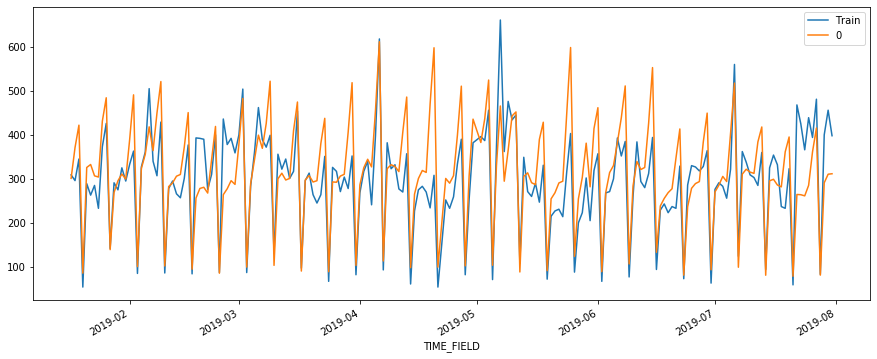

In [171]:
plotThePrevision(y_val_pred_nn,y_val)

### Prédiction par random forest

In [172]:
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor(n_estimators=1000)
model=random_forest.fit(X_train,y_train)

y_val_pred_rf = model.predict(X_val)

In [173]:
tabPercent=CreateTableError(y_val_pred_rf,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_rf,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

valeur prédite:  302.583   valeure réelle : 309.0   pourcentage d erreur : 2.08 %
valeur prédite:  362.952   valeure réelle : 296.0   pourcentage d erreur : 22.62 %
valeur prédite:  389.539   valeure réelle : 345.0   pourcentage d erreur : 12.91 %
valeur prédite:  70.784   valeure réelle : 54.0   pourcentage d erreur : 31.08 %
valeur prédite:  336.041   valeure réelle : 289.0   pourcentage d erreur : 16.28 %
valeur prédite:  349.478   valeure réelle : 263.0   pourcentage d erreur : 32.88 %
valeur prédite:  340.15   valeure réelle : 285.0   pourcentage d erreur : 19.35 %
valeur prédite:  331.869   valeure réelle : 233.0   pourcentage d erreur : 42.43 %
valeur prédite:  376.002   valeure réelle : 373.0   pourcentage d erreur : 0.8 %
valeur prédite:  441.512   valeure réelle : 426.0   pourcentage d erreur : 3.64 %
La moyenne de l erreur est de : 42.610360824742266 %
pourcentage d erreur supérieur à  50 % : 17.525773195876287 %
pourcentage d erreur supérieur à  10 % : 76.28865979381443 %
L

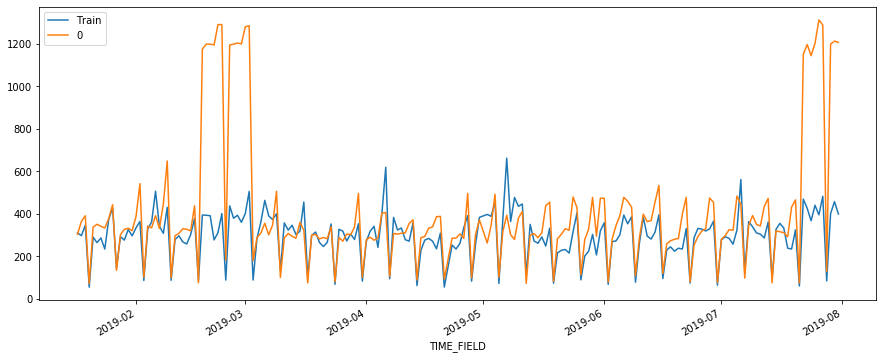

In [174]:
plotThePrevision(y_val_pred_rf,y_val)

### Linear regression

In [175]:
from sklearn import linear_model

lda= linear_model.BayesianRidge(n_iter=1000)
model=lda.fit(X_train,y_train)

y_val_pred_lb = model.predict(X_val)

In [176]:
tabPercent=CreateTableError(y_val_pred_lb,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_lb,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

valeur prédite:  226.63642442526736   valeure réelle : 309.0   pourcentage d erreur : 26.65 %
valeur prédite:  289.7390278628887   valeure réelle : 296.0   pourcentage d erreur : 2.12 %
valeur prédite:  333.40276489145765   valeure réelle : 345.0   pourcentage d erreur : 3.36 %
valeur prédite:  67.17727800211495   valeure réelle : 54.0   pourcentage d erreur : 24.4 %
valeur prédite:  240.5899118733309   valeure réelle : 289.0   pourcentage d erreur : 16.75 %
valeur prédite:  226.31098141411593   valeure réelle : 263.0   pourcentage d erreur : 13.95 %
valeur prédite:  216.38290419771891   valeure réelle : 285.0   pourcentage d erreur : 24.08 %
valeur prédite:  214.31549151281536   valeure réelle : 233.0   pourcentage d erreur : 8.02 %
valeur prédite:  354.8785353902714   valeure réelle : 373.0   pourcentage d erreur : 4.86 %
valeur prédite:  390.67229093167987   valeure réelle : 426.0   pourcentage d erreur : 8.29 %
La moyenne de l erreur est de : 20.33850515463918 %
pourcentage d erreu

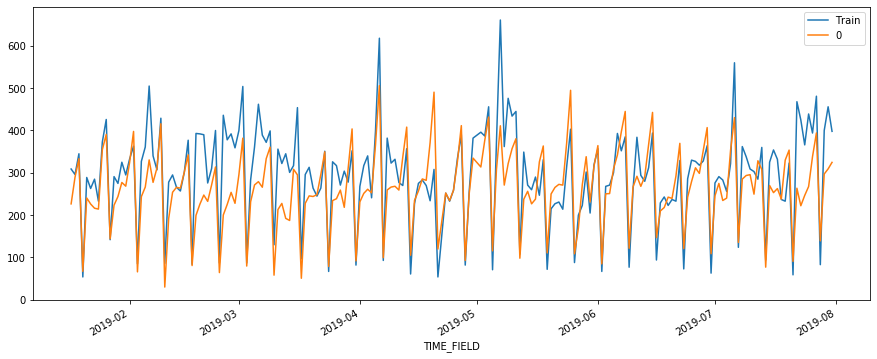

In [177]:
plotThePrevision(y_val_pred_lb,y_val)

### KNeighbors Regression 

In [178]:
from sklearn.neighbors import KNeighborsRegressor

pf= KNeighborsRegressor(n_neighbors=5)
model=pf.fit(X_train,y_train)

y_val_pred_pf = model.predict(X_val)


def pourcentageErreur(yTrue,yPred):
    x=abs(yTrue-yPred)/yTrue*100
    return(round(x,2))

In [179]:
tabPercent=CreateTableError(y_val_pred_pf,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_pf,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

valeur prédite:  311.2   valeure réelle : 309.0   pourcentage d erreur : 0.71 %
valeur prédite:  365.8   valeure réelle : 296.0   pourcentage d erreur : 23.58 %
valeur prédite:  421.2   valeure réelle : 345.0   pourcentage d erreur : 22.09 %
valeur prédite:  85.0   valeure réelle : 54.0   pourcentage d erreur : 57.41 %
valeur prédite:  348.6   valeure réelle : 289.0   pourcentage d erreur : 20.62 %
valeur prédite:  379.2   valeure réelle : 263.0   pourcentage d erreur : 44.18 %
valeur prédite:  366.6   valeure réelle : 285.0   pourcentage d erreur : 28.63 %
valeur prédite:  327.2   valeure réelle : 233.0   pourcentage d erreur : 40.43 %
valeur prédite:  362.4   valeure réelle : 373.0   pourcentage d erreur : 2.84 %
valeur prédite:  392.0   valeure réelle : 426.0   pourcentage d erreur : 7.98 %
La moyenne de l erreur est de : 23.466082474226805 %
pourcentage d erreur supérieur à  50 % : 7.216494845360824 %
pourcentage d erreur supérieur à  10 % : 75.77319587628865 %
La moyenne de l erre

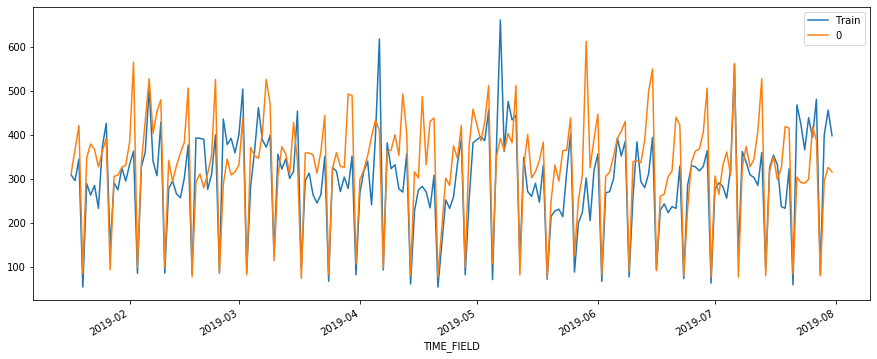

In [180]:
plotThePrevision(y_val_pred_pf,y_val)

# Partie3 : Prévision avec aspect temporelle 

## Time series ----> supervised learning dataset

In [241]:
database.head()

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month,QUANTITY_day-1,STORE_SALES_day-1,TEMPERATURE_day-1,HUMIDITY_MAX_PERCENT_day-1,Margin_Unitaire_day-1,Unit_price_day-1,FAM_SALES-day-1
TIME_FIELD,,,,,,,,,,,,,,,,,,
2016-01-03,79.0,4.720384e+05,486.45,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0,392.0,2.522783e+06,25.0,90.0,0.404842,2.39,2593.8399
2016-01-04,399.0,1.987010e+06,2409.19,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0,79.0,4.720384e+05,25.0,85.0,0.404842,2.39,486.4500
2016-01-05,456.0,2.224192e+06,2542.13,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0,399.0,1.987010e+06,25.0,86.0,0.404842,2.39,2409.1900
2016-01-06,639.0,2.501014e+06,2747.09,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0,456.0,2.224192e+06,23.0,86.0,0.404842,2.39,2542.1300
2016-01-07,526.0,2.240269e+06,2489.46,24.0,88.0,0.404842,2.39,7.0,3.0,1.0,1.0,639.0,2.501014e+06,23.0,86.0,0.404842,2.39,2747.0900


In [242]:
database['QUANTITY_day-1']=database['QUANTITY'].shift(1)
database['STORE_SALES_day-1']=database['STORE_SALES'].shift(1)
database['TEMPERATURE_day-1']=database['TEMPERATURE'].shift(1)
database['HUMIDITY_MAX_PERCENT_day-1']=database['HUMIDITY_MAX_PERCENT'].shift(1)
database['Margin_Unitaire_day-1']=database['Margin_Unitaire'].shift(1)
database['Unit_price_day-1']=database['Unit_price'].shift(1)
database['FAM_SALES-day-1']=database['FAM_SALES'].shift(1)
database.head()

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month,QUANTITY_day-1,STORE_SALES_day-1,TEMPERATURE_day-1,HUMIDITY_MAX_PERCENT_day-1,Margin_Unitaire_day-1,Unit_price_day-1,FAM_SALES-day-1
TIME_FIELD,,,,,,,,,,,,,,,,,,
2016-01-03,79.0,4.720384e+05,486.45,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,399.0,1.987010e+06,2409.19,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0,79.0,4.720384e+05,25.0,85.0,0.404842,2.39,486.45
2016-01-05,456.0,2.224192e+06,2542.13,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0,399.0,1.987010e+06,25.0,86.0,0.404842,2.39,2409.19
2016-01-06,639.0,2.501014e+06,2747.09,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0,456.0,2.224192e+06,23.0,86.0,0.404842,2.39,2542.13
2016-01-07,526.0,2.240269e+06,2489.46,24.0,88.0,0.404842,2.39,7.0,3.0,1.0,1.0,639.0,2.501014e+06,23.0,86.0,0.404842,2.39,2747.09


In [243]:
database=database.dropna()
database.head()

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month,QUANTITY_day-1,STORE_SALES_day-1,TEMPERATURE_day-1,HUMIDITY_MAX_PERCENT_day-1,Margin_Unitaire_day-1,Unit_price_day-1,FAM_SALES-day-1
TIME_FIELD,,,,,,,,,,,,,,,,,,
2016-01-04,399.0,1.987010e+06,2409.19,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0,79.0,4.720384e+05,25.0,85.0,0.404842,2.39,486.45
2016-01-05,456.0,2.224192e+06,2542.13,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0,399.0,1.987010e+06,25.0,86.0,0.404842,2.39,2409.19
2016-01-06,639.0,2.501014e+06,2747.09,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0,456.0,2.224192e+06,23.0,86.0,0.404842,2.39,2542.13
2016-01-07,526.0,2.240269e+06,2489.46,24.0,88.0,0.404842,2.39,7.0,3.0,1.0,1.0,639.0,2.501014e+06,23.0,86.0,0.404842,2.39,2747.09
2016-01-08,448.0,2.401189e+06,2527.70,23.0,89.0,0.404842,2.39,8.0,4.0,1.0,1.0,526.0,2.240269e+06,24.0,88.0,0.404842,2.39,2489.46


In [245]:
from sklearn.model_selection import train_test_split
selector=[ 'Unit_price_day-1' , 'Margin_Unitaire_day-1', 'STORE_SALES_day-1' ,'TEMPERATURE_day-1' , 'HUMIDITY_MAX_PERCENT_day-1','QUANTITY_day-1','FAM_SALES-day-1']
X_train,X_val,y_train,y_val=train_test_split(database[selector], database['QUANTITY'], test_size=0.15,shuffle=False)
print(X_train.shape , y_train.shape , X_val.shape, y_val.shape)

(1097, 7) (1097,) (194, 7) (194,)


### Prédiction temporelle avec random forest

In [246]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
yhat = model.predict(X_val)

In [247]:
tabPercent=CreateTableError(yhat,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(yhat,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

valeur prédite:  297.269   valeure réelle : 309.0   pourcentage d erreur : 3.8 %
valeur prédite:  360.857   valeure réelle : 296.0   pourcentage d erreur : 21.91 %
valeur prédite:  335.436   valeure réelle : 345.0   pourcentage d erreur : 2.77 %
valeur prédite:  349.828   valeure réelle : 54.0   pourcentage d erreur : 547.83 %
valeur prédite:  357.834   valeure réelle : 289.0   pourcentage d erreur : 23.82 %
valeur prédite:  396.172   valeure réelle : 263.0   pourcentage d erreur : 50.64 %
valeur prédite:  297.871   valeure réelle : 285.0   pourcentage d erreur : 4.52 %
valeur prédite:  363.974   valeure réelle : 233.0   pourcentage d erreur : 56.21 %
valeur prédite:  327.91   valeure réelle : 373.0   pourcentage d erreur : 12.09 %
valeur prédite:  409.109   valeure réelle : 426.0   pourcentage d erreur : 3.97 %
La moyenne de l erreur est de : 49.0209793814433 %
pourcentage d erreur supérieur à  50 % : 16.49484536082474 %
pourcentage d erreur supérieur à  10 % : 64.43298969072166 %
La 

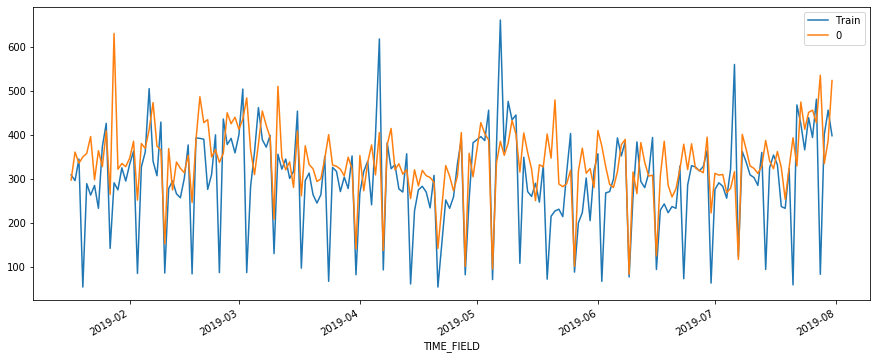

In [248]:
plotThePrevision(yhat,y_val)

## Prédiction temporelle avec un réseaux de neuronne 

In [249]:
neural_net= MLPRegressor(hidden_layer_sizes=1000,activation='relu',learning_rate='constant')
#model=neural_net.fit(X_train,y_train)
#y_val_pred_nn=model.predict(X_val)

start = time.time()

search_space = {'hidden_layer_sizes': [(200, ), (250, ), (64, 32, 16, ), (128, 64 , 32, ), (128,32,), (200,100,)],
               'alpha' : [0.001,0.005,0.02,0.025, 0.03] ,
               'learning_rate' : ['constant', 'invscaling', 'adaptive']}

model = GridSearchCV(estimator = neural_net , param_grid = search_space , cv = 4, verbose= 1, n_jobs = 3,
                     scoring= 'neg_mean_absolute_error' )

model.fit(X_train,y_train)

print('The best parameters found by random search optimisation are : ')
print(model.best_params_)

neural_net = model.best_estimator_

neural_net.fit(X_train,y_train)

end = time.time()
print('This training took : ', end - start , 's') 

y_val_pred_nn = neural_net.predict(X_val)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   20.4s
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:   37.7s finished


The best parameters found by random search optimisation are : 
{'alpha': 0.001, 'hidden_layer_sizes': (128, 32), 'learning_rate': 'constant'}
This training took :  38.2772159576416 s


In [250]:
tabPercent=CreateTableError(y_val_pred_nn,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_nn,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

#{'alpha': 0.03, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}

valeur prédite:  264.9097616307874   valeure réelle : 309.0   pourcentage d erreur : 14.27 %
valeur prédite:  263.9225653913774   valeure réelle : 296.0   pourcentage d erreur : 10.84 %
valeur prédite:  306.79721690068544   valeure réelle : 345.0   pourcentage d erreur : 11.07 %
valeur prédite:  348.4803723215038   valeure réelle : 54.0   pourcentage d erreur : 545.33 %
valeur prédite:  70.05907053294796   valeure réelle : 289.0   pourcentage d erreur : 75.76 %
valeur prédite:  259.4092545284104   valeure réelle : 263.0   pourcentage d erreur : 1.37 %
valeur prédite:  283.59425256983667   valeure réelle : 285.0   pourcentage d erreur : 0.49 %
valeur prédite:  246.26786162768548   valeure réelle : 233.0   pourcentage d erreur : 5.69 %
valeur prédite:  245.90788766835175   valeure réelle : 373.0   pourcentage d erreur : 34.07 %
valeur prédite:  333.5173726681707   valeure réelle : 426.0   pourcentage d erreur : 21.71 %
La moyenne de l erreur est de : 81.1730412371134 %
pourcentage d erre

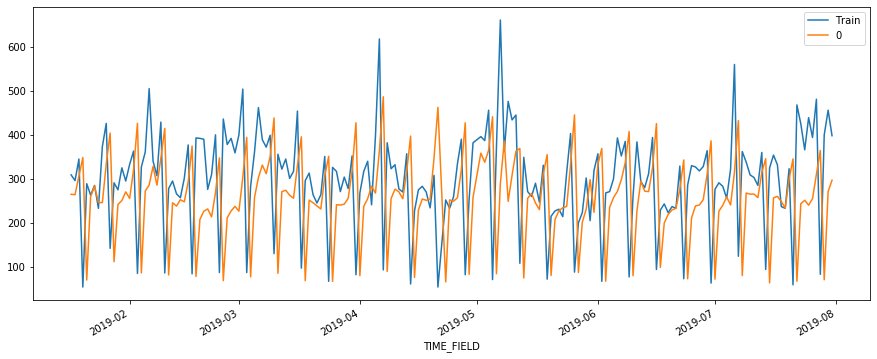

In [251]:
plotThePrevision(y_val_pred_nn,y_val)

### Essaie avec dataset différentiel

In [327]:
dataDif=pd.read_csv('/Users/reihan/Documents/DossierPython/ProjetDataAnalysisPython/database.csv')  
dataDif = dataDif.set_index('TIME_FIELD')
dataDif.head()

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month
TIME_FIELD,,,,,,,,,,,
2016-01-02,392.0,2.522783e+06,2593.8399,25.0,90.0,0.404842,2.39,2.0,5.0,53.0,1.0
2016-01-03,79.0,4.720384e+05,486.4500,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0
2016-01-04,399.0,1.987010e+06,2409.1900,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0
2016-01-05,456.0,2.224192e+06,2542.1300,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0
2016-01-06,639.0,2.501014e+06,2747.0900,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0


In [328]:
dataDif["diff1"] = np.nan
dataDif.loc[1:, "diff1"] = (dataDif.iloc[1:, 0].values - dataDif.iloc[:len(dataDif)-1, 0].values)
pd.concat([dataDif.head(n=3), dataDif.tail(n=3)])

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month,diff1
TIME_FIELD,,,,,,,,,,,,
2016-01-02,392.0,2.522783e+06,2593.8399,25.0,90.0,0.404842,2.39,2.0,5.0,53.0,1.0,NaN
2016-01-03,79.0,4.720384e+05,486.4500,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0,-313.0
2016-01-04,399.0,1.987010e+06,2409.1900,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0,320.0
2019-07-29,400.0,1.507739e+06,2247.8000,24.0,88.0,0.206779,2.15,29.0,0.0,31.0,7.0,317.0
2019-07-30,456.0,1.610319e+06,2538.1100,23.0,86.0,0.206779,2.15,30.0,1.0,31.0,7.0,56.0
2019-07-31,398.0,1.615483e+06,2219.2200,23.0,89.0,0.206779,2.15,31.0,2.0,31.0,7.0,-58.0


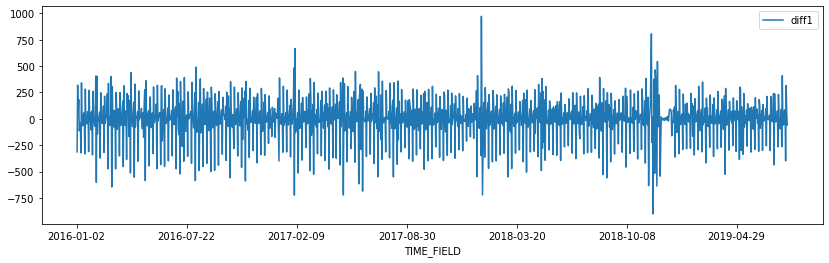

In [329]:
dataDif.plot( y="diff1", figsize=(14,4))

In [330]:
dataDif['diff2']=dataDif['diff1'].shift(1)
dataDif['diff3']=dataDif['diff2'].shift(1)
dataDif['diff4']=dataDif['diff3'].shift(1)
dataDif['diff5']=dataDif['diff4'].shift(1)
dataDif['diff6']=dataDif['diff5'].shift(1)
dataDif['diff7']=dataDif['diff6'].shift(1)
dataDif.head(10)

,QUANTITY,STORE_SALES,FAM_SALES,TEMPERATURE,HUMIDITY_MAX_PERCENT,Margin_Unitaire,Unit_price,day,week_day,week,month,diff1,diff2,diff3,diff4,diff5,diff6,diff7
TIME_FIELD,,,,,,,,,,,,,,,,,,
2016-01-02,392.0,2.522783e+06,2593.8399,25.0,90.0,0.404842,2.39,2.0,5.0,53.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,79.0,4.720384e+05,486.4500,25.0,85.0,0.404842,2.39,3.0,6.0,53.0,1.0,-313.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,399.0,1.987010e+06,2409.1900,25.0,86.0,0.404842,2.39,4.0,0.0,1.0,1.0,320.0,-313.0,NaN,NaN,NaN,NaN,NaN
2016-01-05,456.0,2.224192e+06,2542.1300,23.0,86.0,0.404842,2.39,5.0,1.0,1.0,1.0,57.0,320.0,-313.0,NaN,NaN,NaN,NaN
2016-01-06,639.0,2.501014e+06,2747.0900,23.0,86.0,0.404842,2.39,6.0,2.0,1.0,1.0,183.0,57.0,320.0,-313.0,NaN,NaN,NaN
2016-01-07,526.0,2.240269e+06,2489.4600,24.0,88.0,0.404842,2.39,7.0,3.0,1.0,1.0,-113.0,183.0,57.0,320.0,-313.0,NaN,NaN
2016-01-08,448.0,2.401189e+06,2527.7000,23.0,89.0,0.404842,2.39,8.0,4.0,1.0,1.0,-78.0,-113.0,183.0,57.0,320.0,-313.0,NaN
2016-01-09,408.0,2.576818e+06,2546.1002,23.0,88.0,0.404842,2.39,9.0,5.0,1.0,1.0,-40.0,-78.0,-113.0,183.0,57.0,320.0,-313.0
2016-01-10,85.0,4.512337e+05,497.1100,24.0,89.0,0.410842,2.39,10.0,6.0,1.0,1.0,-323.0,-40.0,-78.0,-113.0,183.0,57.0,320.0


In [331]:
dataDif=dataDif.dropna()

In [337]:
from sklearn.model_selection import train_test_split
selector=['diff1','diff2','diff3',"diff4","diff5","diff6","diff7",'week_day']
X_train,X_val,y_train,y_val=train_test_split(dataDif[selector], dataDif['QUANTITY'], test_size=0.15,shuffle=False)
print(X_train.shape , y_train.shape , X_val.shape, y_val.shape)

(1093, 8) (1093,) (193, 8) (193,)


In [338]:
X_train.head(10)

,diff1,diff2,diff3,diff4,diff5,diff6,diff7,week_day
TIME_FIELD,,,,,,,,
2016-01-09,-40.0,-78.0,-113.0,183.0,57.0,320.0,-313.0,5.0
2016-01-10,-323.0,-40.0,-78.0,-113.0,183.0,57.0,320.0,6.0
2016-01-11,341.0,-323.0,-40.0,-78.0,-113.0,183.0,57.0,0.0
2016-01-12,-15.0,341.0,-323.0,-40.0,-78.0,-113.0,183.0,1.0
2016-01-13,-67.0,-15.0,341.0,-323.0,-40.0,-78.0,-113.0,2.0
2016-01-14,42.0,-67.0,-15.0,341.0,-323.0,-40.0,-78.0,3.0
2016-01-15,-34.0,42.0,-67.0,-15.0,341.0,-323.0,-40.0,4.0
2016-01-16,60.0,-34.0,42.0,-67.0,-15.0,341.0,-323.0,5.0
2016-01-17,-333.0,60.0,-34.0,42.0,-67.0,-15.0,341.0,6.0


### Linear regression

In [339]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X_train, y_train)
y_val_pred_clr = clr.predict(X_val)

In [340]:
tabPercent=CreateTableError(y_val_pred_clr,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_clr,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

valeur prédite:  333.9161692111811   valeure réelle : 296.0   pourcentage d erreur : 12.81 %
valeur prédite:  396.0960203040741   valeure réelle : 345.0   pourcentage d erreur : 14.81 %
valeur prédite:  127.25668207308374   valeure réelle : 54.0   pourcentage d erreur : 135.66 %
valeur prédite:  360.9138798683568   valeure réelle : 289.0   pourcentage d erreur : 24.88 %
valeur prédite:  342.5307989484145   valeure réelle : 263.0   pourcentage d erreur : 30.24 %
valeur prédite:  362.0635880860065   valeure réelle : 285.0   pourcentage d erreur : 27.04 %
valeur prédite:  313.4521043487985   valeure réelle : 233.0   pourcentage d erreur : 34.53 %
valeur prédite:  449.32805750447767   valeure réelle : 373.0   pourcentage d erreur : 20.46 %
valeur prédite:  492.147806088926   valeure réelle : 426.0   pourcentage d erreur : 15.53 %
valeur prédite:  213.9717648254573   valeure réelle : 142.0   pourcentage d erreur : 50.68 %
La moyenne de l erreur est de : 28.676373056994812 %
pourcentage d er

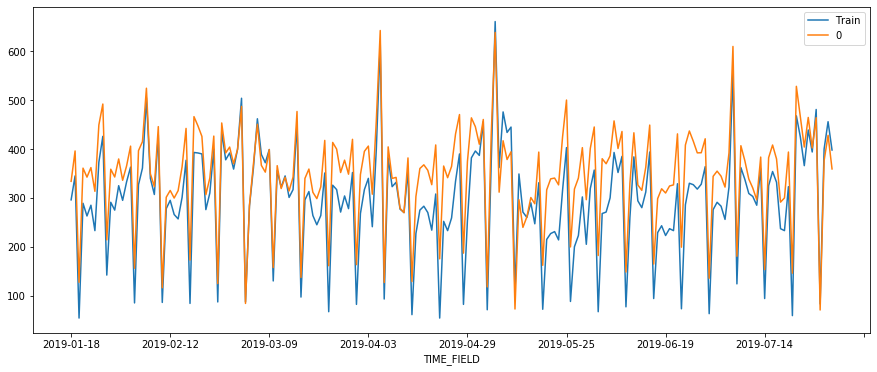

In [341]:
plotThePrevision(y_val_pred_clr,y_val)

In [342]:
from sklearn.metrics import r2_score
r2_score(y_val, clr.predict(X_val))

0.6667277291712042

### Random Forest

In [343]:
clr = RandomForestRegressor()
clr.fit(X_train, y_train)
y_val_pred_clr = clr.predict(X_val)
tabPercent=CreateTableError(y_val_pred_clr,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)

tabSemaine=ErreurSur7jours(y_val_pred_clr,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)

valeur prédite:  335.81   valeure réelle : 296.0   pourcentage d erreur : 13.45 %
valeur prédite:  389.76   valeure réelle : 345.0   pourcentage d erreur : 12.97 %
valeur prédite:  73.71   valeure réelle : 54.0   pourcentage d erreur : 36.5 %
valeur prédite:  299.65   valeure réelle : 289.0   pourcentage d erreur : 3.69 %
valeur prédite:  280.96   valeure réelle : 263.0   pourcentage d erreur : 6.83 %
valeur prédite:  304.96   valeure réelle : 285.0   pourcentage d erreur : 7.0 %
valeur prédite:  281.83   valeure réelle : 233.0   pourcentage d erreur : 20.96 %
valeur prédite:  435.58   valeure réelle : 373.0   pourcentage d erreur : 16.78 %
valeur prédite:  430.93   valeure réelle : 426.0   pourcentage d erreur : 1.16 %
valeur prédite:  82.62   valeure réelle : 142.0   pourcentage d erreur : 41.82 %
La moyenne de l erreur est de : 12.157046632124352 %
pourcentage d erreur supérieur à  50 % : 0.0 %
pourcentage d erreur supérieur à  10 % : 47.66839378238342 %
La moyenne de l erreur sur l

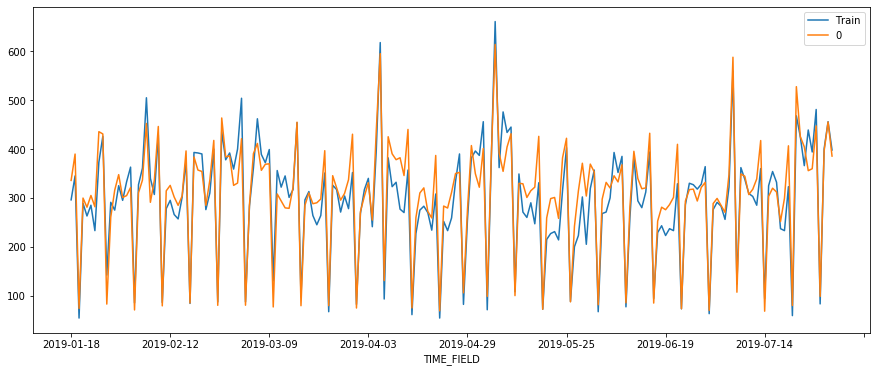

In [344]:
plotThePrevision(y_val_pred_clr,y_val)

### Neural Network

In [345]:
neural_net= MLPRegressor(hidden_layer_sizes=1000,activation='relu',learning_rate='constant')
#model=neural_net.fit(X_train,y_train)
#y_val_pred_nn=model.predict(X_val)

start = time.time()

search_space = {'hidden_layer_sizes': [(200, ), (250, ), (64, 32, 16, ), (128, 64 , 32, ), (128,32,), (200,100,)],
               'alpha' : [0.001,0.005,0.02,0.025, 0.03] ,
               'learning_rate' : ['constant', 'invscaling', 'adaptive']}

model = GridSearchCV(estimator = neural_net , param_grid = search_space , cv = 4, verbose= 1, n_jobs = 3,
                     scoring= 'neg_mean_absolute_error' )

model.fit(X_train,y_train)

print('The best parameters found by random search optimisation are : ')
print(model.best_params_)

neural_net = model.best_estimator_

neural_net.fit(X_train,y_train)

end = time.time()
print('This training took : ', end - start , 's') 

y_val_pred_nn = neural_net.predict(X_val)

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   21.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:  3.0min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The best parameters found by random search optimisation are : 
{'alpha': 0.03, 'hidden_layer_sizes': (200, 100), 'learning_rate': 'constant'}
This training took :  184.67047119140625 s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [348]:
tabPercent=CreateTableError(y_val_pred_nn,y_val)
print('La moyenne de l erreur est de :',mean(tabPercent),'%')

OverXError(50,tabPercent)
OverXError(10,tabPercent)
OverXError(5,tabPercent)


tabSemaine=ErreurSur7jours(y_val_pred_nn,y_val)
print('La moyenne de l erreur sur la semaine est de :',mean(tabSemaine),'%')

OverXError(50,tabSemaine)
OverXError(10,tabSemaine)
OverXError(5,tabSemaine)


#{'alpha': 0.03, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive'}

valeur prédite:  310.08107923893783   valeure réelle : 296.0   pourcentage d erreur : 4.76 %
valeur prédite:  347.4636758701131   valeure réelle : 345.0   pourcentage d erreur : 0.71 %
valeur prédite:  65.97182944854715   valeure réelle : 54.0   pourcentage d erreur : 22.17 %
valeur prédite:  304.0135180721359   valeure réelle : 289.0   pourcentage d erreur : 5.19 %
valeur prédite:  284.44142929653844   valeure réelle : 263.0   pourcentage d erreur : 8.15 %
valeur prédite:  304.8783051659583   valeure réelle : 285.0   pourcentage d erreur : 6.97 %
valeur prédite:  252.73023341999522   valeure réelle : 233.0   pourcentage d erreur : 8.47 %
valeur prédite:  403.96474252911986   valeure réelle : 373.0   pourcentage d erreur : 8.3 %
valeur prédite:  463.76160029052045   valeure réelle : 426.0   pourcentage d erreur : 8.86 %
valeur prédite:  130.31690280780126   valeure réelle : 142.0   pourcentage d erreur : 8.23 %
La moyenne de l erreur est de : 7.562901554404144 %
pourcentage d erreur su

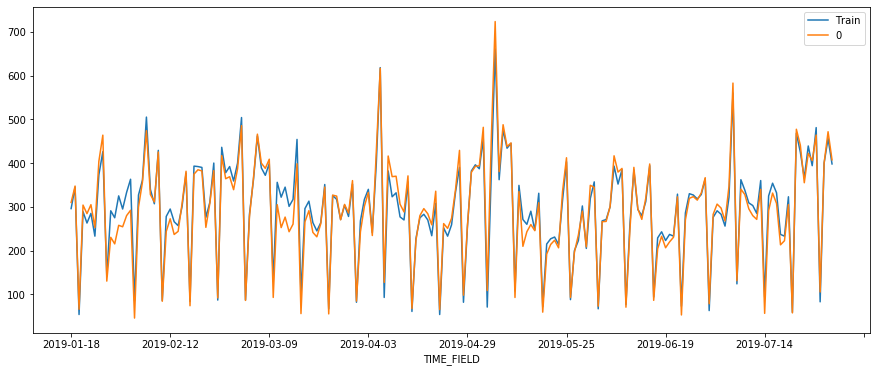

In [347]:
plotThePrevision(y_val_pred_nn,y_val)